<a href="https://colab.research.google.com/github/ryanrodr/probabilidade-estatistica/blob/main/Cap01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
plt.style.use('bmh')

In [ ]:
caminho = '/content/drive/MyDrive/questionario.xlsx'

df = pd.read_excel(caminho)
df.head(3)

,Id,Turma,Sexo,Idade,Alt,Peso,Filhos,Fuma,Toler,Exerc,Cine,OpCine,TV,OpTV
0,1,A,F,17,1.60,60.5,2,NAO,P,0,1,B,16,R
1,2,A,F,18,1.69,55.0,1,NAO,M,0,1,B,7,R
2,3,A,M,18,1.85,72.8,2,NAO,P,5,2,M,15,R


In [ ]:
frequencia_gen = df['Sexo'].value_counts()
frequencia_gen_rel = df['Sexo'].value_counts(normalize=True) * 100

tabela_gen = pd.DataFrame({'Frequência': frequencia_gen,
                            'Frequência Relativa (%)': frequencia_gen_rel})

tabela_gen['Frequência Acumulada'] = tabela_gen['Frequência'].cumsum()
tabela_gen['Frequência Relativa Acumulada (%)'] = tabela_gen['Frequência Acumulada'] / tabela_gen['Frequência'].sum() * 100
tabela_gen.reset_index(inplace=True)
tabela_gen[['Sexo', 'Frequência', 'Frequência Relativa (%)']]

,Sexo,Frequência,Frequência Relativa (%)
0,F,37,74.0
1,M,13,26.0


In [ ]:
frequencia_idade = df['Idade'].value_counts()
frequencia_idade_rel = df['Idade'].value_counts(normalize=True) * 100

tabela_idade = pd.DataFrame({'Frequência': frequencia_idade,
                            'Frequência Relativa (%)': frequencia_idade_rel})

tabela_idade = tabela_idade.reset_index().sort_values(by='Idade')
tabela_idade['Frequência Acumulada'] = tabela_idade['Frequência'].cumsum()
tabela_idade['Frequência Relativa Acumulada (%)'] = tabela_idade['Frequência Acumulada'] / tabela_idade['Frequência'].sum() * 100
tabela_idade

,Idade,Frequência,Frequência Relativa (%),Frequência Acumulada,Frequência Relativa Acumulada (%)
1,17,9,18.0,9,18.0
0,18,22,44.0,31,62.0
2,19,7,14.0,38,76.0
3,20,4,8.0,42,84.0
4,21,3,6.0,45,90.0
6,23,2,4.0,47,94.0
7,24,1,2.0,48,96.0
5,25,2,4.0,50,100.0


In [ ]:
# Definindo as Faixas de Peso com List Comprehension
bins = [x / 10 for x in range(400, 1100, 100)]

# Especificando 6 intervalos para os Labels
labels = ['40-50kg', '50-60kg', '60-70kg', '70-80kg', '80-90kg', '90-100kg']

df['ClassesPeso'] = pd.cut(df['Peso'],
                        bins=bins,
                        labels=labels,
                        right=False)

In [ ]:
df['ClassesPeso'].value_counts().reset_index()\
    .rename(columns={'count': 'Frequência'})\
        .sort_values(by='ClassesPeso')

,ClassesPeso,Frequência
1,40-50kg,8
0,50-60kg,22
2,60-70kg,8
3,70-80kg,6
4,80-90kg,5
5,90-100kg,1


In [ ]:
frequencia_peso = df['ClassesPeso'].value_counts()
frequencia_peso_rel = df['ClassesPeso'].value_counts(normalize=True) * 100
tabela_peso = pd.DataFrame({'Frequência': frequencia_peso,
                            'Frequência Relativa (%)': frequencia_peso_rel})

tabela_peso = tabela_peso.reset_index().sort_values(by='ClassesPeso')
tabela_peso['Frequência Acumulada'] = tabela_peso['Frequência'].cumsum()
tabela_peso['Frequência Relativa Acumulada (%)'] = tabela_peso['Frequência Acumulada'] / tabela_peso['Frequência'].sum() * 100
tabela_peso

,ClassesPeso,Frequência,Frequência Relativa (%),Frequência Acumulada,Frequência Relativa Acumulada (%)
1,40-50kg,8,16.0,8,16.0
0,50-60kg,22,44.0,30,60.0
2,60-70kg,8,16.0,38,76.0
3,70-80kg,6,12.0,44,88.0
4,80-90kg,5,10.0,49,98.0
5,90-100kg,1,2.0,50,100.0


In [ ]:
bins = [0, 6, 12, 18, 24, 36]
labels = ['0 ao 6', '6 ao 12', '12 ao 18', '18 ao 24', '24 ao 36']

df['Classes TV'] = pd.cut(df['TV'],
                          bins=bins,
                          labels=labels,
                          right=False)

frequencia_tv = df['Classes TV'].value_counts()
frequencia_tv_rel = df['Classes TV'].value_counts(normalize=True) * 100

tabela_tv = pd.DataFrame({'Frequência': frequencia_tv,
                          'Frequência Relativa (%)': frequencia_tv_rel})

tabela_tv = tabela_tv.reset_index().sort_values(by='Classes TV')
tabela_tv['Frequência Acumulada'] = tabela_tv['Frequência'].cumsum()
tabela_tv['Frequência Relativa Acumulada (%)'] = tabela_tv['Frequência Acumulada'] / tabela_tv['Frequência'].sum() * 100
tabela_tv

,Classes TV,Frequência,Frequência Relativa (%),Frequência Acumulada,Frequência Relativa Acumulada (%)
1,0 ao 6,14,28.0,14,28.0
0,6 ao 12,17,34.0,31,62.0
2,12 ao 18,11,22.0,42,84.0
3,18 ao 24,4,8.0,46,92.0
4,24 ao 36,4,8.0,50,100.0


In [ ]:
df['Toler'].value_counts(normalize=True)

Toler
P    0.42
M    0.38
I    0.20
Name: proportion, dtype: float64

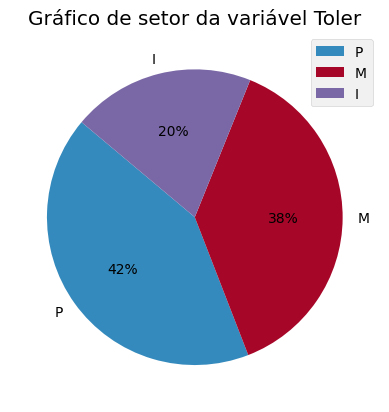

In [ ]:
# Extração dos dados
labels = df['Toler'].unique()
sizes = df['Toler'].value_counts()

# Criação do gráfico de pizza
plt.pie(sizes, labels=labels, autopct='%1.f%%', startangle=140)
plt.title('Gráfico de setor da variável Toler')
plt.legend()
plt.plot();

In [ ]:
tabela_idade

,Idade,Frequência,Frequência Relativa (%),Frequência Acumulada,Frequência Relativa Acumulada (%)
1,17,9,18.0,9,18.0
0,18,22,44.0,31,62.0
2,19,7,14.0,38,76.0
3,20,4,8.0,42,84.0
4,21,3,6.0,45,90.0
6,23,2,4.0,47,94.0
7,24,1,2.0,48,96.0
5,25,2,4.0,50,100.0


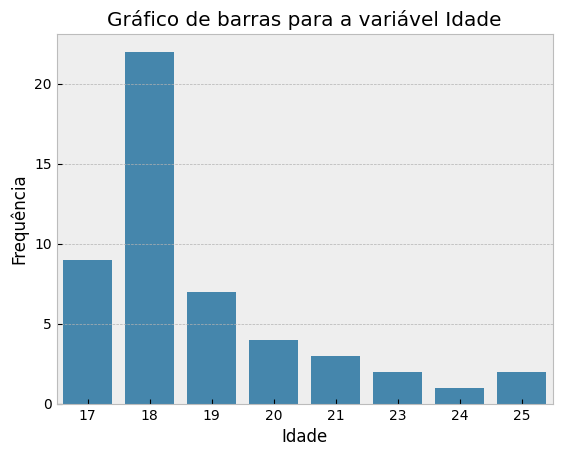

In [ ]:
sns.barplot(x='Idade', y='Frequência', data=tabela_idade)
plt.title('Gráfico de barras para a variável Idade');

In [ ]:
bins_peso = [x / 10 for x in range(400, 1100, 100)]
labels_peso = ['40 ao 50', '50 ao 60', '60 ao 70', '70 ao 80', '80 ao 90', '90 ao 100']

df['Classes Peso'] = pd.cut(df['Peso'],
                        bins=bins_peso,
                        labels=labels_peso,
                        right=False)

frequencia_peso = df['Classes Peso'].value_counts()
frequencia_peso_rel = df['Classes Peso'].value_counts(normalize=True)
tabela_peso = pd.DataFrame({'Frequência': frequencia_peso,
                            'Frequência Relativa (%)': frequencia_peso_rel})

tabela_peso = tabela_peso.reset_index().sort_values(by='Classes Peso')
tabela_peso['Frequência Acumulada'] = tabela_peso['Frequência'].cumsum()
tabela_peso['Frequência Relativa Acumulada (%)'] = tabela_peso['Frequência Acumulada'] / tabela_peso['Frequência'].sum() * 100
tabela_peso

,Classes Peso,Frequência,Frequência Relativa (%),Frequência Acumulada,Frequência Relativa Acumulada (%)
1,40 ao 50,8,0.16,8,16.0
0,50 ao 60,22,0.44,30,60.0
2,60 ao 70,8,0.16,38,76.0
3,70 ao 80,6,0.12,44,88.0
4,80 ao 90,5,0.10,49,98.0
5,90 ao 100,1,0.02,50,100.0


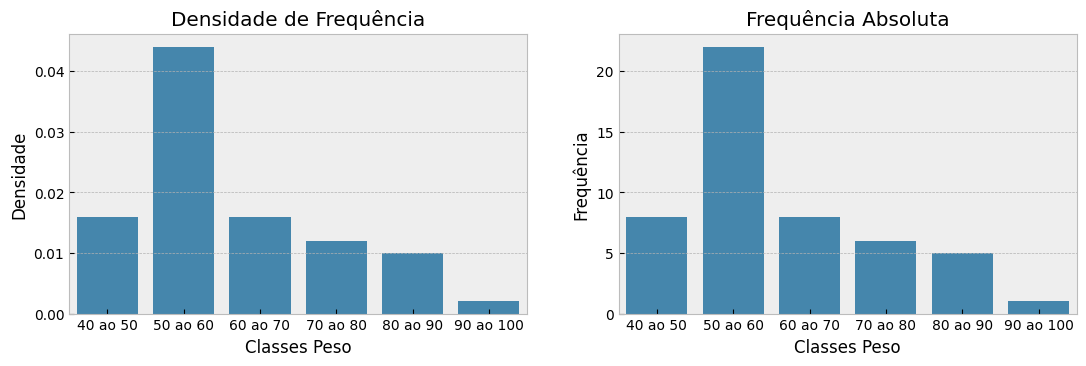

In [ ]:
plt.figure(figsize=(13, 8))

tabela_peso['Frequência Relativa (%)'] = tabela_peso['Frequência Relativa (%)'] / 10

ax1 = plt.subplot(2, 2, 1)
sns.barplot(x='Classes Peso', y='Frequência Relativa (%)', data=tabela_peso)
ax1.set_ylabel('Densidade')
plt.title('Densidade de Frequência')

ax2 = plt.subplot(2, 2, 2)
sns.barplot(x='Classes Peso', y='Frequência', data=tabela_peso)
plt.title('Frequência Absoluta');

In [ ]:
df['Alt'].quantile([0.25, 0.5, 0.75])

0.25    1.6025
0.50    1.6650
0.75    1.7175
Name: Alt, dtype: float64

In [ ]:
df['Peso'].quantile([0.25, 0.5, 0.75])

0.25    52.125
0.50    58.000
0.75    67.875
Name: Peso, dtype: float64

In [ ]:
altura = df['Alt'].quantile([0.25, 0.5, 0.75])
peso = df['Peso'].quantile([0.25, 0.5, 0.75])

pd.DataFrame({'Altura': altura, 'Peso': peso}).reset_index().rename(columns={'index': 'Quantile'})

,Quantile,Altura,Peso
0,0.25,1.6025,52.125
1,0.50,1.6650,58.000
2,0.75,1.7175,67.875


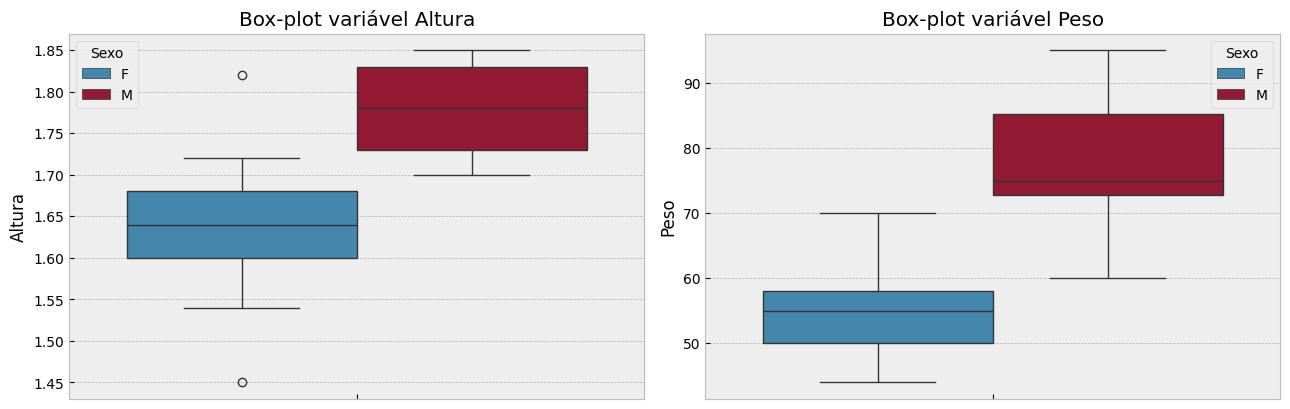

In [ ]:
plt.figure(figsize=(13, 8))

ax1 = plt.subplot(2, 2, 1)
sns.boxplot(y='Alt', hue='Sexo', data=df, ax=ax1)
ax1.set_ylabel('Altura')
plt.title('Box-plot variável Altura')

ax2 = plt.subplot(2, 2, 2)
sns.boxplot(y='Peso', hue='Sexo', data=df, ax=ax2)
plt.title('Box-plot variável Peso')

plt.tight_layout()
plt.show()

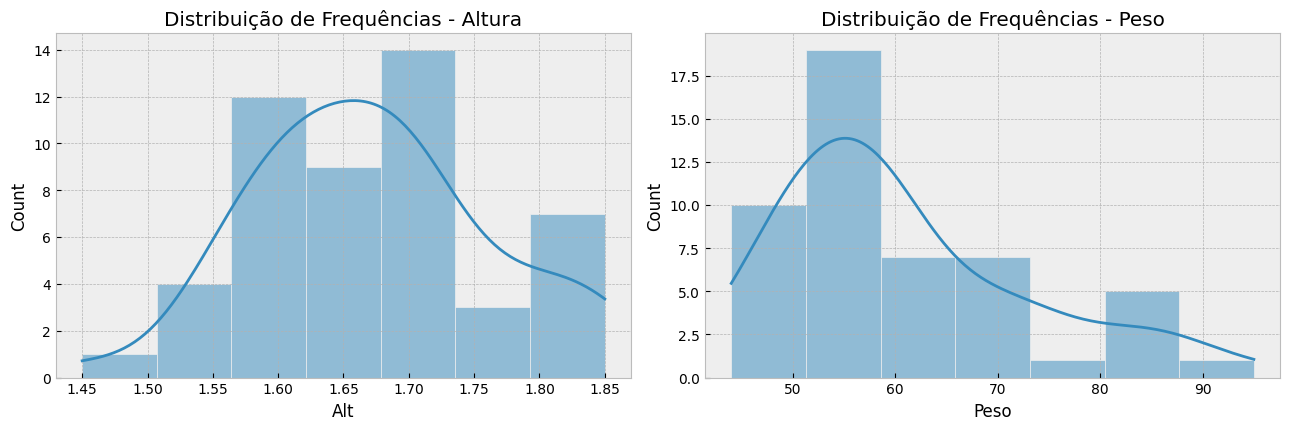

In [ ]:
plt.figure(figsize=(13, 8))

# distribuicao assimetrica
ax1 = plt.subplot(2, 2, 1)
sns.histplot(x='Alt', data=df, kde=True, ax=ax1)
plt.title('Distribuição de Frequências - Altura')

# distribuicao assimetrica positiva
ax2 = plt.subplot(2, 2, 2)
sns.histplot(x='Peso', data=df, kde=True, ax=ax2)
plt.title('Distribuição de Frequências - Peso')

plt.tight_layout()
plt.show()

In [ ]:
df.head(3)

,Id,Turma,Sexo,Idade,Alt,Peso,Filhos,Fuma,Toler,Exerc,Cine,OpCine,TV,OpTV,ClassesPeso,Classes TV,Classes Peso
0,1,A,F,17,1.60,60.5,2,NAO,P,0,1,B,16,R,60-70kg,12 ao 18,60 ao 70
1,2,A,F,18,1.69,55.0,1,NAO,M,0,1,B,7,R,50-60kg,6 ao 12,50 ao 60
2,3,A,M,18,1.85,72.8,2,NAO,P,5,2,M,15,R,70-80kg,12 ao 18,70 ao 80


In [ ]:
df_homens = df[df['Sexo'] == 'M']
df_mulheres = df[df['Sexo'] == 'F']

# Calcular os decis para homens e mulheres
decis_homens = df_homens['Peso'].quantile([i / 10 for i in range(1, 10)])
decis_mulheres = df_mulheres['Peso'].quantile([i / 10 for i in range(1, 10)])

df_decil = pd.DataFrame({'Mulheres': decis_mulheres, 'Homens': decis_homens})
df_decil

,Mulheres,Homens
0.1,47.76,69.00
0.2,49.36,71.72
0.3,51.92,72.92
0.4,54.20,73.00
0.5,55.00,75.00
0.6,56.60,81.52
0.7,58.00,84.48
0.8,58.90,85.68
0.9,61.50,86.80


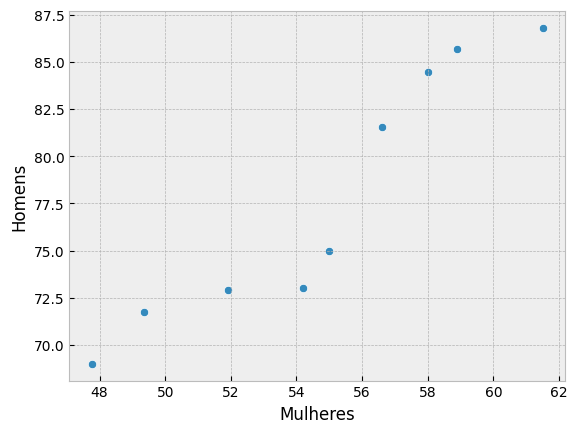

In [ ]:
sns.scatterplot(x='Mulheres', y='Homens', data=df_decil);